In [1]:
# Import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
test_2=pd.read_csv("sample_submission.csv")

In [3]:
test=pd.merge(how='inner', )

((1460, 81), (1459, 80))

Since ID is not relate to Sale Price, drop

In [4]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [5]:
#y = train['SalePrice'].reset_index(drop=True)
#train_features = train.drop(['SalePrice'], axis=1)
train_features=train
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop=True)

In [6]:
train_numeric = features.dtypes[train.dtypes != "object"].index
train_category = features.dtypes[train.dtypes == "object"].index

Let's look for any missing/null values

In [7]:
total = features.isnull().sum().sort_values(
        ascending=False)[features.isnull().sum().sort_values(ascending=False) != 0]
percent = (features.isnull().sum().sort_values(ascending=False) / len(features) *
               100)[(features.isnull().sum().sort_values(ascending=False) / len(features) *
                     100) != 0]
missing_values = pd.concat([total,percent], axis=1, keys=['Missing','Percent'])
missing_values.head(20)

,Missing,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
SalePrice,1459,49.982871
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


In [8]:
 for col in train_category:
     features[col].replace(np.nan, features[col].mode(), inplace=True)

for col in train_numeric:
    features[col].replace(np.nan, features[col].median(), inplace=True)

In [9]:
# Change some int variables to categorical as they are that
features['MoSold'] = features['MoSold'].astype('category')

# One-hot encoding
features = pd.get_dummies(features)

features.isnull().sum().sort_values(ascending=False)

# Split back to train and test dataframes
print("Data shape", features.shape)
train_df = features.loc[features['SalePrice'].isnull() == False]
test_df = features.loc[features['SalePrice'].isnull() == True].drop('SalePrice', axis=1)
print(test_df.isna().sum().loc[test_df.isna().sum() > 0])


Data shape (2919, 300)
Series([], dtype: int64)


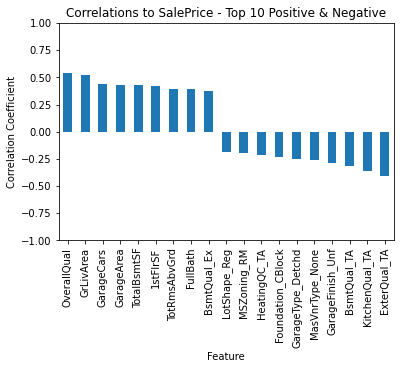

In [10]:
top20 = pd.concat([train_df.corr()['SalePrice'].sort_values(ascending=False)[1:10], train_df.corr()['SalePrice'].sort_values(ascending=False)[-10:]])
ax = top20.plot.bar()
ax.set_ylim(-1.0, 1.0)
plt.title("Correlations to SalePrice - Top 10 Positive & Negative")
plt.xlabel("Feature")
plt.ylabel("Correlation Coefficient")
plt.grid(False)
plt.show()

In [31]:
# Train-test split
from sklearn.model_selection import train_test_split

X = train_df.drop(['SalePrice'], axis=1).values

# Square root of the output to make high values less dominant
y = np.sqrt(train_df['SalePrice'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

x_scaler=StandardScaler.fit(X_train)
y_scaler=StandardScaler.fit(y_train)


TypeError: fit() missing 1 required positional argument: 'X'

In [32]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
lasso_reg=Lasso(alpha=0.00001, normalize=True)
lasso_reg.fit(X_train,y_train)

train_score=lasso_reg.score(X_train,y_train)
test_score=lasso_reg.score(X_test,y_test)
coeff_used00001 = np.sum(lasso_reg.coef_!=0)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score) 
print("LR test score: ", lr_test_score)

print("training score for alpha=0.0001:", train_score) 
print("test score for alpha =0.0001: ", test_score)
print("number of features used: for alpha =0.0001:", coeff_used00001)

LR training score: 0.5273793064157815
LR test score:  0.3744738651155971
training score for alpha=0.0001: 0.5273554186636897
test score for alpha =0.0001:  0.3705281207287978
number of features used: for alpha =0.0001: 281


In [33]:
from sklearn.metrics import mean_squared_error
predictions=lasso_reg.predict(X_test)
LR_predictions=lr.predict(X_test)


MSE=mean_squared_error(y_test,predictions)
r2=lasso_reg.score(X_test,y_test)

MSE2=mean_squared_error(y_test,LR_predictions)
r22=lr.score(X_test,y_test)

print(f"MSE: {MSE}, R2: {r2}")
print(f"MSE: {MSE2}, R2: {r22}")


MSE: 2690.607932259194, R2: 0.3705281207287978
MSE: 2673.7422842526757, R2: 0.3744738651155971


TypeError: 'tuple' object is not callable